In [1]:
import netCDF4 as nc
import matplotlib.pyplot as plt
from matplotlib.colors import from_levels_and_colors
import numpy as np
from matplotlib import animation
from matplotlib.colors import BoundaryNorm
import matplotlib.colors as cols
import matplotlib as mpl
from mpl_toolkits.basemap import Basemap
from matplotlib import ticker, cm
import seaborn as sns

In [2]:
# 65 大气压 20-330 

result11 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:121]
    plot65two = data.variables['PSL'][0,100,-160:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result11[i] = A
    i = i + 1

In [3]:
result11[0:10]

array([98292.625    , 98205.2578125, 98168.828125 , 98340.0859375,
       97836.0390625, 98272.140625 , 98411.2109375, 97700.6328125,
       97353.453125 , 97412.53125  ])

In [4]:
# 40 大气压 20-330

result12 = np.zeros((3720))
i = 0
nu = [f"{x:04d}" for x in range(0,3720)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:121]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-160:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result12[i] = A
    i = i + 1

In [5]:
result12[0:10]

array([101455.1171875, 101702.1875   , 101723.375    , 101438.7578125,
       101280.1328125, 101253.71875  , 101647.       , 101457.625    ,
       101866.2734375, 101760.2890625])

In [6]:
# 65 330-338
result21 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:121]
    plot65two = data.variables['PSL'][0,100,-160:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result21[i] = A
    i = i + 1

In [7]:
# 40 330-338
result22 = np.zeros((96))
i = 0
nu = [f"{x:04d}" for x in range(1,97)]
i =0
for mm in nu:
    data=nc.Dataset('/scratch/user/xiliangdiao/firstpaper/SAM/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:121]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-160:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result22[i] = A
    i = i + 1

In [8]:
# 65 大气压 338-500

result31 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air500/CESM_PSL_'+mm+'_.nc')
    plot65 = data.variables['PSL'][0,100,0:121]
    plot65two = data.variables['PSL'][0,100,-160:-1]
    P65 = np.hstack((plot65two,plot65))
    A = np.nanmean(P65)
    #B = np.nanmean(plot65two)
    result31[i] = A
    i = i + 1

In [9]:
# 40 大气压 338-500

result32 = np.zeros((1955))
i = 0
nu = [f"{x:04d}" for x in range(0,1955)]
i =0
for mm in nu:
    data=nc.Dataset('/ihesp/user/xiliangdiao/data/ihespdata/air/TRY/CESM_PSL_'+mm+'_.nc')
    plot40 = data.variables['PSL'][0,200,0:121]
    #plot40 = data.variables['PSL'][0,200,:]
    plot40two = data.variables['PSL'][0,200,-160:-1]
    P40 = np.hstack((plot40two,plot40))
    A = np.nanmean(P40)
    #B = np.nanmean(plot40two)
    #result2[i] = (A + B)/2
    result32[i] = A
    i = i + 1

In [10]:
re65 = np.hstack((result11,result21))
re652 = np.hstack((re65,result31))

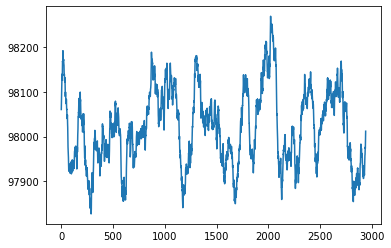

In [11]:
try1 = np.convolve(re652[2768:5768], np.ones((60,))/60, mode='valid')
plt.plot(try1)

NameError: name 'dmean' is not defined

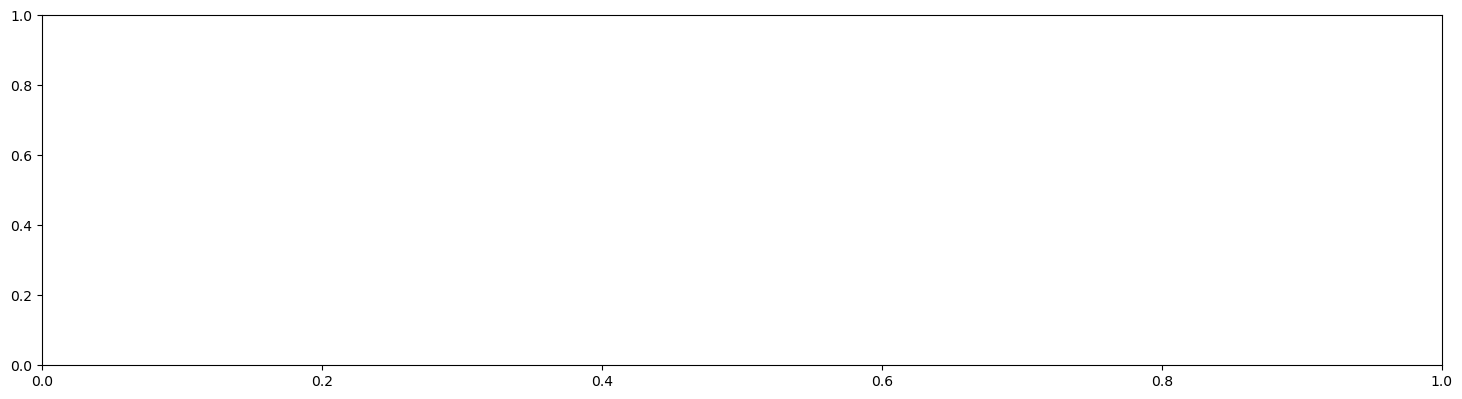

In [12]:
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(dmean,'purple',linewidth=3)
#plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='grey', alpha=1)
#########################################
plt.xticks(range(0,250,20), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)
ax0.set_title('yearly mean (45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Pa',color= 'black',**my_font)
plt.axis("tight")
plt.savefig("pimdpi3.png",bbox_inches='tight',dpi=fig.dpi)

In [ ]:
2760/12

In [13]:
re40 = np.hstack((result12,result22))
re402 = np.hstack((re40,result32))

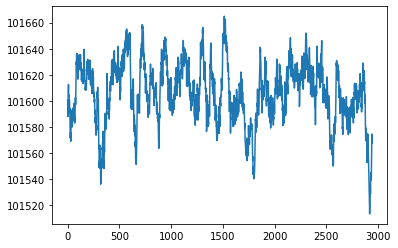

In [14]:
try1 = np.convolve(re402[2760:5760], np.ones((60,))/60, mode='valid')
plt.plot(try1)

In [15]:
std = np.std(re652)
ave65 = np.nanmean(re652)
final65 = (re652 - ave65)/std

std = np.std(re402)
ave40 = np.nanmean(re402)
final40 = (re402 - ave40)/std

In [16]:
ave65

98024.56282490036

In [17]:
ave40

101605.0926832438

In [ ]:
ddd20062100 = final65-final40

In [ ]:
ddd20062100.shape

In [ ]:
130*12

In [ ]:
d2 = ddd20062100[2760:5760]

In [ ]:
d4 = d2.reshape(250,12)

In [ ]:
dmean = np.nanmean(d4,axis=1)

In [ ]:
ww2 = np.convolve(d2, np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww2)

In [ ]:
plt.plot(ww2)

findfont: Font family ['Cambria'] not found. Falling back to DejaVu Sans.


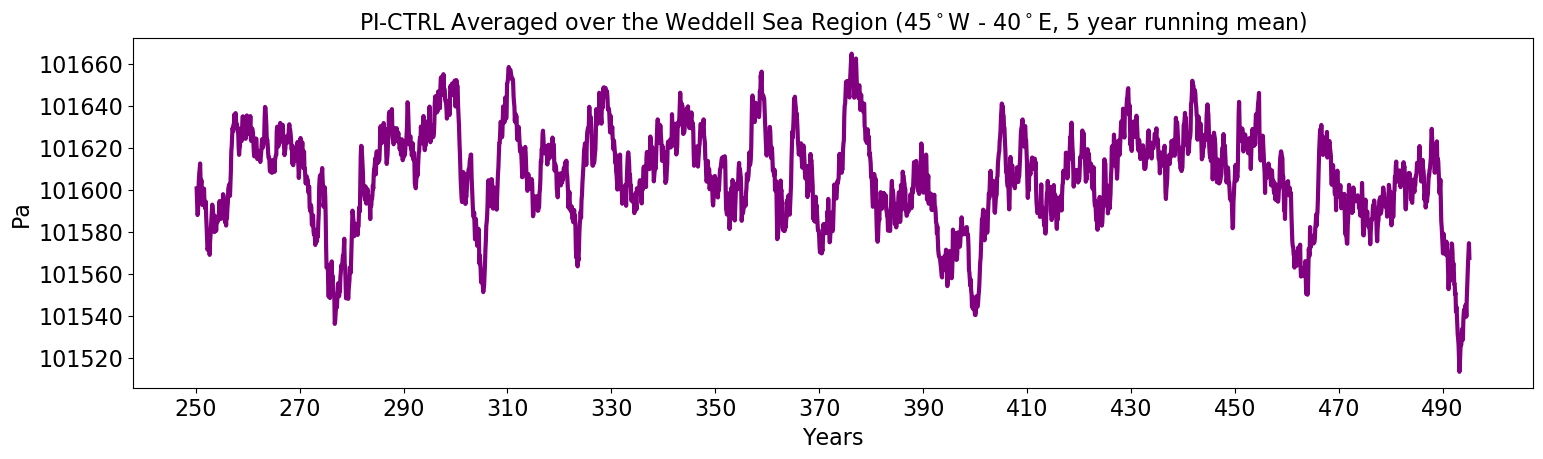

In [24]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,5), dpi=100)
ax0 = fig.add_axes([0.1,0.1,0.7,0.7])
#ax0.vlines(xxx, 0, 0.65, colors = "yellow")
ax0.plot(t,try1,'purple',linewidth=3)
#plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='grey', alpha=1)
#########################################
plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
plt.xlabel('Years',**my_font)
plt.xlabel('Years',**my_font)
plt.ylabel('Pa',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
#ax0.set(ylim=(-0.7, 0.7),xlim=(0, 2952))
ax0.set_title('PI-CTRL Averaged over the Weddell Sea Region (45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
plt.savefig("pimdpi.png",bbox_inches='tight',dpi=fig.dpi)

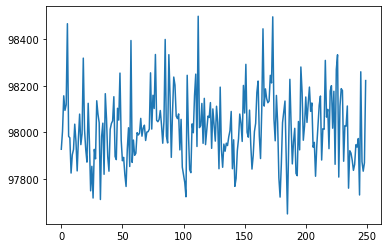

In [25]:
d2 = re652[2768:5768]
d4 = d2.reshape(250,12)
dmean = np.nanmean(d4,axis=1)

plt.plot(dmean)

In [26]:
np.save(file="MPDi250.npy", arr=ww2)

In [27]:
ww65 = np.convolve(final65[2760:5760], np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww65)

In [28]:
ww40 = np.convolve(final40[2760:5760], np.ones((60,))/60, mode='valid')
mean = np.nanmean(ww40)

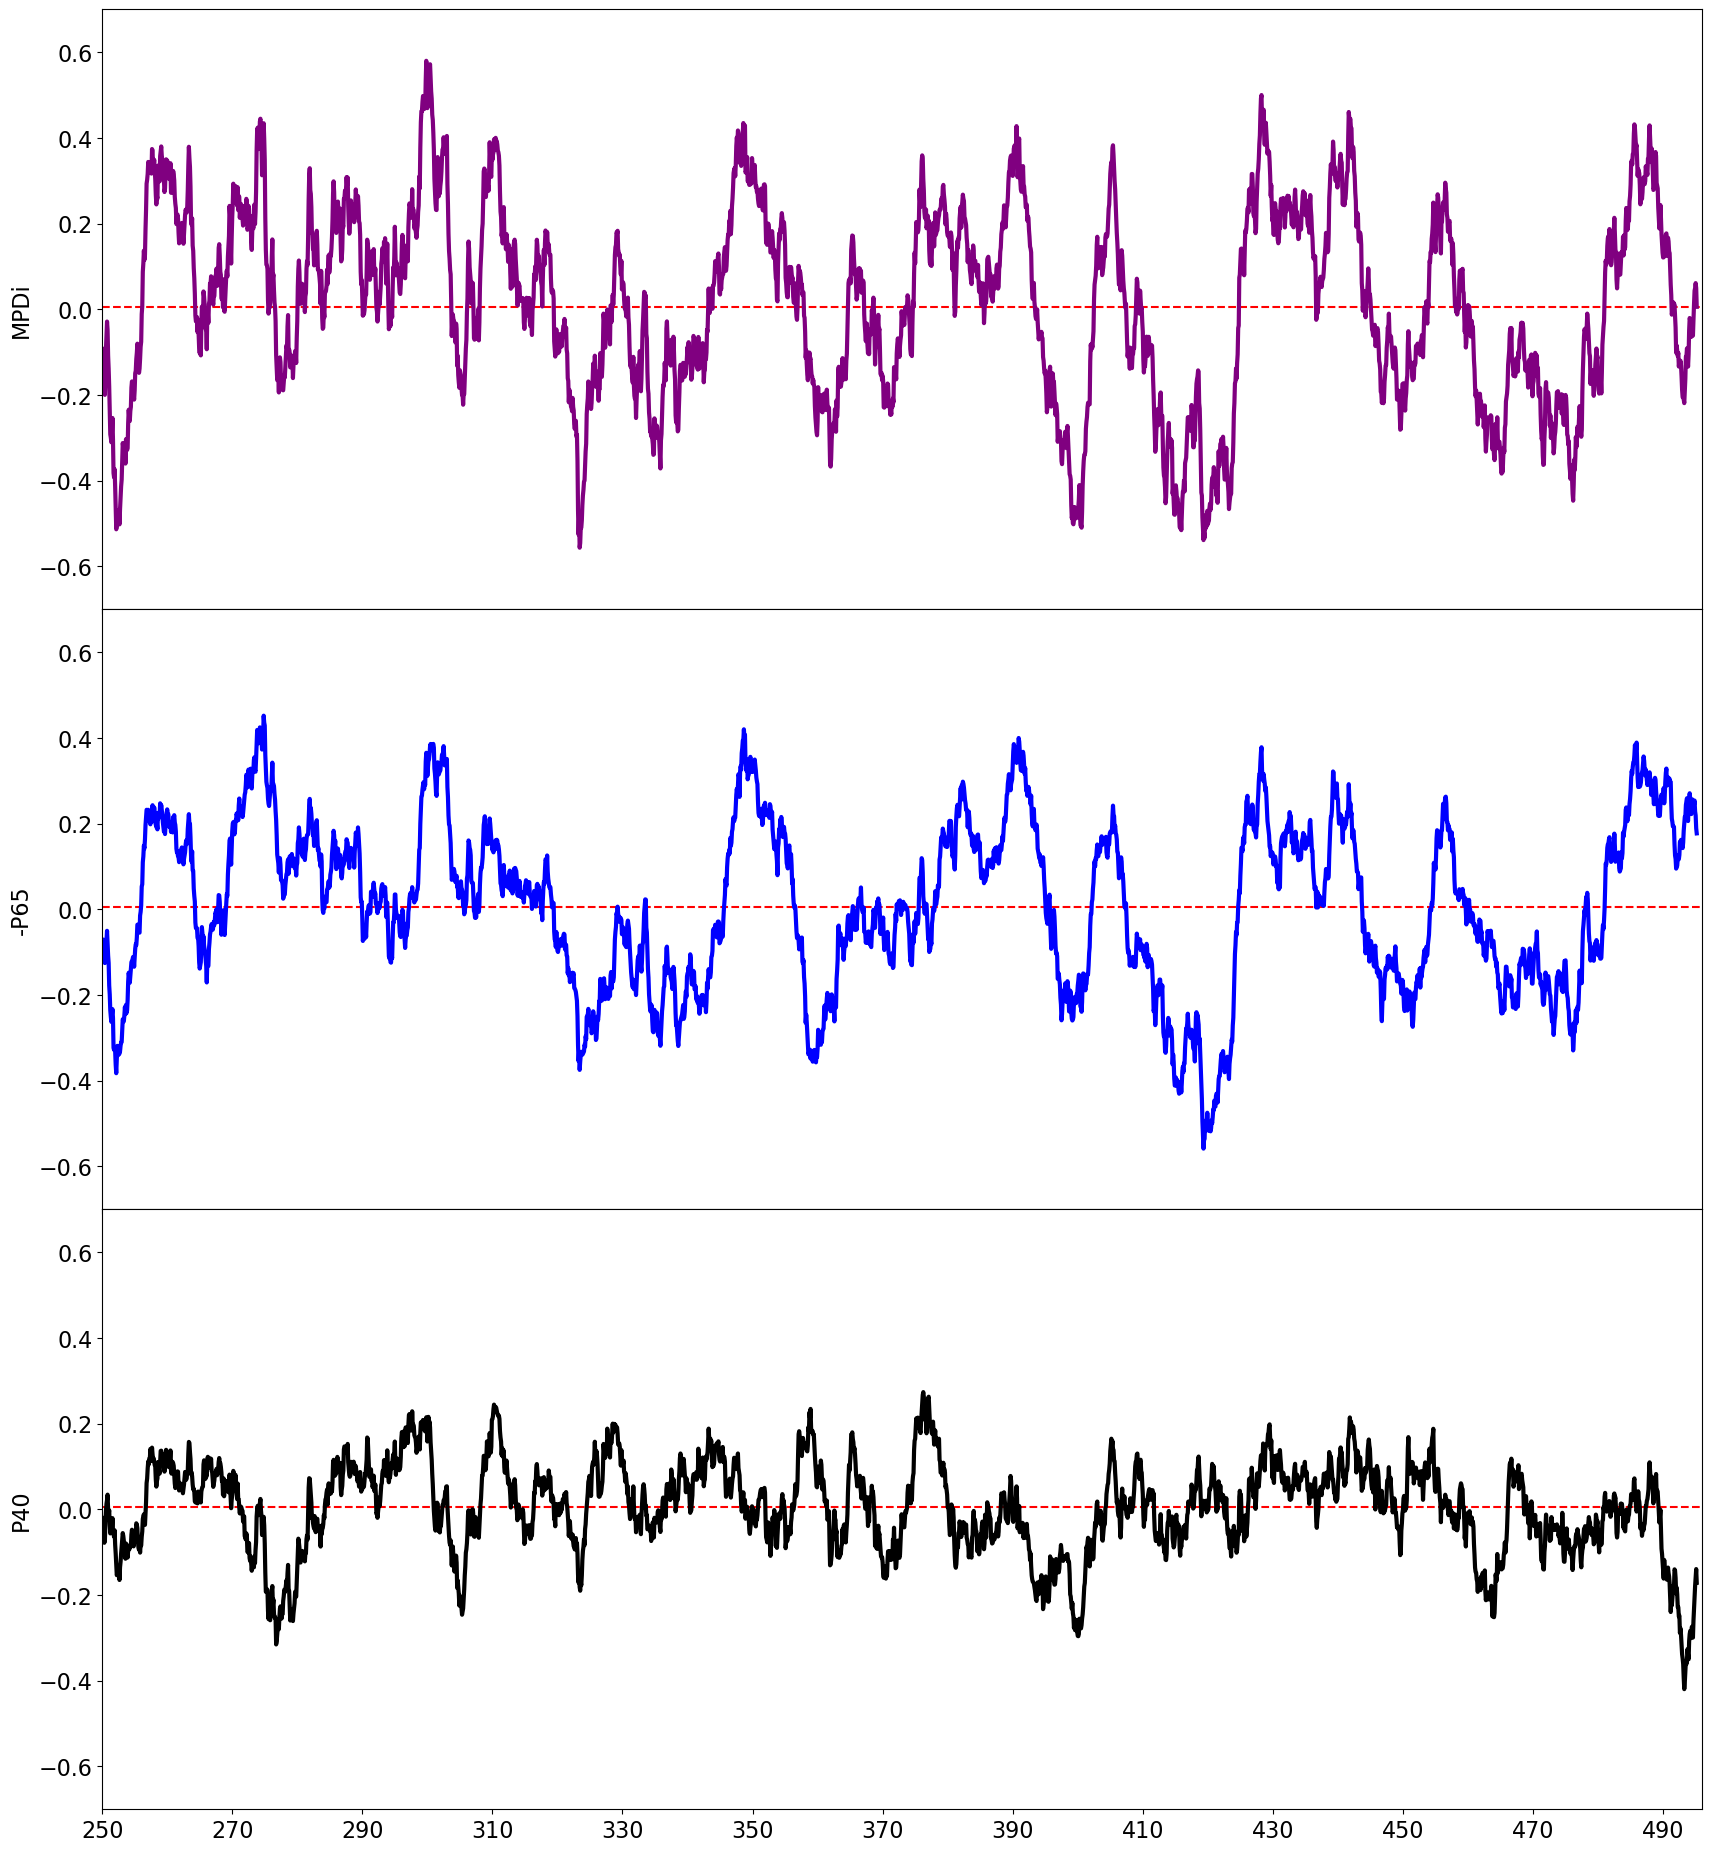

In [29]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'16'}
##################################################################
fig = plt.figure(figsize=(20,15), dpi=100)
################################################################
################################################################

ax1 = fig.add_axes([0.1, 0.9, 0.8, 0.4],
                   xticklabels=[])
#ax0 = plt.subplot(2,1,1)
ax1.plot(t,-ww2,'purple',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['1850','1870','1890','1910','1930', '1950', '1970','1990','2010','2030','2050', '2070', '2090','410','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('MPDi',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax1.set(ylim=(-0.7, 0.7),xlim=(0, 2952))
#ax1.set_title('HF-TNST simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
###########################################
ax2 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[])
ax2.plot(t,-ww65,'blue',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('-P65',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax2.set(ylim=(-0.7, 0.7),xlim=(0, 2952))
#ax2.set_title('PI-CTRL simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)

#####################################################################

ax3 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   xticklabels=[])
ax3.plot(t,ww40,'black',linewidth=3)
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)

plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
plt.ylabel('P40',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax3.set(ylim=(-0.7, 0.7),xlim=(0, 2952))
plt.savefig("MPDise.png",bbox_inches='tight',dpi=fig.dpi)

In [30]:
ww65plot = np.loadtxt("/scratch/user/xiliangdiao/plot-HF/ww65plot.out")
ww40plot = np.loadtxt("/scratch/user/xiliangdiao/plot-HF/ww40plot.out")
RMPDplot1 = np.loadtxt("/scratch/user/xiliangdiao/plot-HF/RMPDplot1.out")

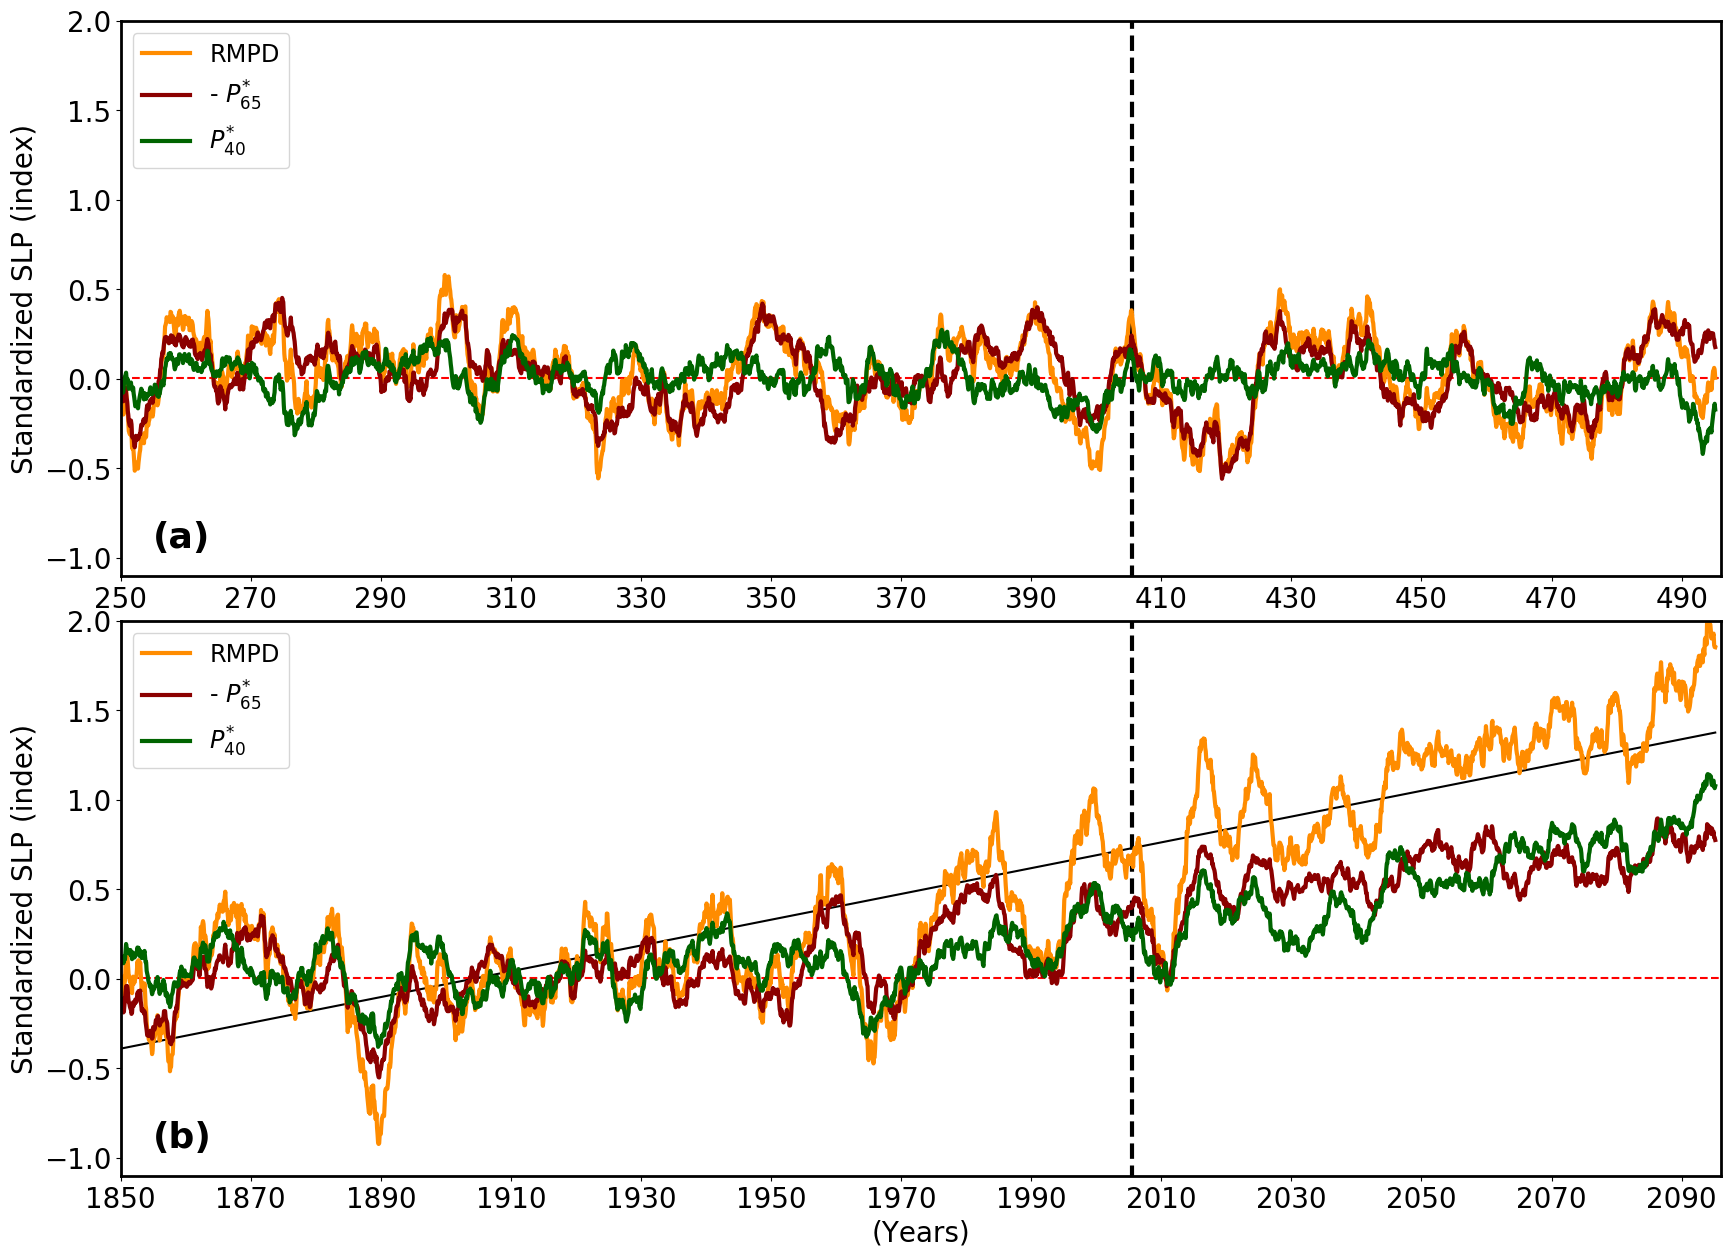

In [48]:
t = np.arange(2,2943,1)
my_font = {'fontname':'Cambria', 'size':'20'}
##################################################################
fig = plt.figure(figsize=(20,15), dpi=100)
################################################################
################################################################


ax2 = fig.add_axes([0.1, 0.9, 0.8, 0.37],
                   xticklabels=[])
ax2.plot(t,-ww2,'darkorange',linewidth=3,label='RMPD' )
ax2.plot(t,-ww65,'darkred',linewidth=3,label='- $P^{*}_{65}$' )
ax2.plot(t,ww40,'darkgreen',linewidth=3,label='$P^{*}_{40}$' )
#ax2.plot(t,ww40-ww65,'yellow',linewidth=3,label='$P^{*}_{40}$' )
#ax2.plot(t,ww40-ww65,'red')
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
plt.xticks(range(0,2952,240), ['250','270','290','310','330', '350', '370','390','410','430','450', '470', '490','510','430','450','470','490','500'],**my_font)
ax2=plt.gca();#获得坐标轴的句柄
ax2.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax2.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax2.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax2.spines['top'].set_linewidth(2);###设置右边坐标轴的粗细
#plt.yticks(**my_font)

plt.vlines(1866, -1.25, 2.5, colors = "black",linestyles = "dashed",linewidth=3)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('-P65',color= 'black',**my_font)
plt.axis("tight")
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax2.set(ylim=(-1.1, 2),xlim=(0, 2952))
plt.yticks(**my_font)
plt.legend(loc='upper left',fontsize='xx-large')
plt.ylabel('Standardized SLP (index)',color= 'black',**my_font)

ax2.text(0.02, 0.05, '(a)', transform=ax2.transAxes,size=26, weight='bold')
#ax2.set_title('PI-CTRL simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
ax3 = fig.add_axes([0.1, 0.5, 0.8, 0.37],
                   xticklabels=[])
ax3.plot(t, intercept + slope*aaa, 'black')
ax3.plot(t,-RMPDplot1+0.5,'darkorange',linewidth=3,label='RMPD')
ax3.plot(t,-ww65plot+0.25,'darkred',linewidth=3,label='- $P^{*}_{65}$')
#plt.plot(t, intercept + slope*aaa, 'black')
ax3.plot(t,ww40plot+0.25,'darkgreen',linewidth=3,label='$P^{*}_{40}$')
plt.hlines(mean, 0, 2952, colors = "red",linestyles = "dashed")
#plt.vlines(1876, -1.25, 1, colors = "red",linestyles = "dashed")
#ax0.fill_between(t,mean,-ww2,where=-ww2 < 0,facecolor='red', alpha=1)
#########################################
#plt.xticks(range(0,2952,240), ['1850','1870','1890','1910','1930', '1950', '1970','1990','2010','2030','2050', '2070', '2090','410','430','450','470','490','500'],**my_font)
ax3=plt.gca();#获得坐标轴的句柄
ax3.spines['bottom'].set_linewidth(2);###设置底部坐标轴的粗细
ax3.spines['left'].set_linewidth(2);####设置左边坐标轴的粗细
ax3.spines['right'].set_linewidth(2);###设置右边坐标轴的粗细
ax3.spines['top'].set_linewidth(2);###设置右边坐标轴的粗细
plt.yticks(**my_font)
#plt.xlabel('Years',**my_font)
#plt.xlabel('Years',**my_font)
#plt.ylabel('RMPD index',color= 'black',**my_font)
plt.axis("tight")
plt.vlines(1866, -1.25, 2.5, colors = "black",linestyles = "dashed",linewidth=3)
#plt.hlines(0, 0, 4200, colors = "g",linestyles = "dashed")
ax3.set(ylim=(-1.1, 2),xlim=(0, 2952))
#ax1.set_title('HF-TNST simulation (averaged over the Weddell Sea Region 45$^\circ$W - 40$^\circ$E, 5 year running mean)',**my_font)
###########################################
plt.xticks(range(0,2952,240), ['1850','1870','1890','1910','1930', '1950', '1970','1990','2010','2030','2050', '2070', '2090','410','430','450','470','490','500'],**my_font)
plt.xlabel('(Years)',color= 'black',**my_font)
plt.yticks(**my_font)
ax3.text(0.02, 0.05, '(b)', transform=ax3.transAxes,size=26, weight='bold')
plt.legend(loc='upper left',fontsize='xx-large')
plt.ylabel('Standardized SLP (index)',color= 'black',**my_font)
plt.savefig("MPDise.png",bbox_inches='tight',dpi=fig.dpi)

In [32]:
aaa = np.arange(0,2941,)

In [33]:
np.corrcoef(-ww2,-ww65)

array([[1.        , 0.87902898],
       [0.87902898, 1.        ]])

In [34]:
np.corrcoef(-ww2,ww40)

array([[1.        , 0.50199893],
       [0.50199893, 1.        ]])

In [43]:
from scipy import stats
slope, intercept, r_value, p_value, std_err = stats.linregress(aaa,bbb)

In [44]:
slope*12

0.0072008634739310915

In [45]:
ww2.shape

(2941,)

In [46]:
2941/12

245.08333333333334

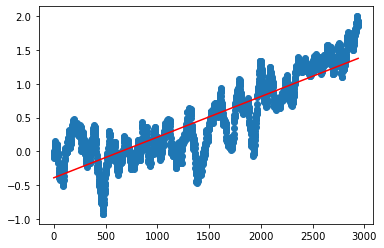

In [47]:
plt.plot(aaa, bbb, 'o', label='original data')
plt.plot(aaa, intercept + slope*aaa, 'r', label='fitted line')

In [40]:
bbb = -RMPDplot1+0.5

In [41]:
bbb.shape

(2941,)

In [42]:
245*12

2940

In [49]:
np.corrcoef(-RMPDplot1+0.5,-ww65plot+0.25)

array([[1.        , 0.96102325],
       [0.96102325, 1.        ]])

In [50]:
np.corrcoef(-RMPDplot1+0.5,ww40plot+0.25)

array([[1.        , 0.95477727],
       [0.95477727, 1.        ]])

In [51]:
np.corrcoef(-ww65plot+0.25,ww40plot+0.25)

array([[1.        , 0.83536327],
       [0.83536327, 1.        ]])